In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Preprocessing

In [ ]:
# converting to data_frame
import pandas as pd
file_path = "/content/drive/MyDrive/Word2Vec/100.csv"
df = pd.read_csv(file_path)
print(df.head())

   Index                                          Abstracts
0      1   The hypothesis of an important role of gut mi...
1      2   Cannabis use has been reported to induce long...
2      3   Cannabidiol (CBD) is a non-psychotomimetic ph...
3      4   OBJECTIVE: Women with a history of bipolar di...
4      5   The poor physical health faced by people with...


In [ ]:
# removing stop words and punctuation

!pip install nltk
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
text_column = "Abstracts"

# Read the CSV file into a DataFrame
file_path = "/content/drive/MyDrive/Word2Vec/100.csv"
df = pd.read_csv(file_path)

# Function to remove punctuation and stop words
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Join tokens back into a string
    processed_text = ' '.join(tokens)

    return processed_text

# Apply preprocessing to the text column
df['processed_text'] = df[text_column].apply(preprocess_text)

# Save the DataFrame with the processed text to a new CSV file
output_file_path = "/content/drive/MyDrive/Word2Vec/1_processed.csv"
df.to_csv(output_file_path, index=False)

# Display the DataFrame with the processed text
print(df[['Abstracts', 'processed_text']].head())

                                           Abstracts  \
0   The hypothesis of an important role of gut mi...   
1   Cannabis use has been reported to induce long...   
2   Cannabidiol (CBD) is a non-psychotomimetic ph...   
3   OBJECTIVE: Women with a history of bipolar di...   
4   The poor physical health faced by people with...   

                                      processed_text  
0  hypothesis important role gut microbiota maint...  
1  Cannabis use reported induce longlasting psych...  
2  Cannabidiol CBD nonpsychotomimetic phytocannab...  
3  OBJECTIVE Women history bipolar disorder postp...  
4  poor physical health faced people mental illne...  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Word 2 Vec

## Training

In [ ]:
# !pip install gensim

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk
nltk.download('punkt')

text_column_name = "processed_abstract"  # Replace with the actual column name

# Read the CSV file into a DataFrame
file_path = "/content/drive/MyDrive/MajorProject/final_preprocessed_data_jan.csv"
df = pd.read_csv(file_path)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.head()

,Index,Abstracts,processed_abstract
0,1,The hypothesis of an important role of gut mi...,hypothesis important role gut microbiota maint...
1,2,Cannabis use has been reported to induce long...,cannabis use reported induce psychotic disorde...
2,3,Cannabidiol (CBD) is a non-psychotomimetic ph...,cannabidiol cbd phytocannabinoid derived canna...
3,4,OBJECTIVE: Women with a history of bipolar di...,objective women history bipolar disorder postp...
4,5,The poor physical health faced by people with...,poor physical health faced people mental illne...


In [ ]:
tokenized_text = []

for text in df[text_column_name]:
  try:
    text_tokenized = word_tokenize(text)
    tokenized_text.append(text_tokenized)
  except:
    print(text)

In [ ]:
dict = {'tokenized_text': tokenized_text}

df_tok = pd.DataFrame(dict)

# saving the dataframe
df_tok.to_csv('/content/drive/MyDrive/MajorProject/final_processed_tokenized.csv')

In [ ]:
len(tokenized_text)

1632898

In [ ]:
# Train Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=3, min_count=1, workers=4)





FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Word2Vec/word2vec_model.model.wv.vectors.npy'

In [ ]:
# Save the trained model
model.save("/content/drive/MyDrive/MajorProject/WordtoVec/model/w2v.model")

In [ ]:
# Example: Get the vector representation of a word
word = "cannabis"
vector_representation = model.wv[word]
print(f"Vector representation of {word}:", vector_representation)

Vector representation of cannabis: [ 0.1847066  -5.1170225  -1.465052    2.0472362   1.3709346   0.12344427
 -1.5113366  -2.11566    -0.69604284 -2.7790961   0.4826127  -2.4847035
  3.8931367   2.9121594  -1.1280309   0.90014124 -0.4963316  -0.91599053
  1.0275519   4.23086    -1.1215075   2.3235056   3.1550722   0.41640058
 -0.2086111   3.0077655   1.5828685  -1.6312182   1.5554875   1.0160674
 -0.8868119   1.7236805  -2.166205    2.1327035   3.867302   -0.30070913
  2.5444362   2.552325   -1.0739212  -2.8730013  -0.7155382   2.1676414
 -2.4615314   1.2833937   2.6920607  -1.9397392  -0.06628202  2.1713855
 -0.57399416  0.24018784 -0.01908685 -0.70915574 -0.6476595   0.89458615
  0.4287024   2.7105894  -0.7647312   2.0487926  -0.18062155  1.7149936
 -0.92253107  0.06849127 -2.039787    1.3540864  -1.1785531  -1.0752745
 -0.5075037   3.4747114  -0.93636286 -1.1564547  -2.6537426  -2.0060654
 -0.5760281  -3.0149362  -0.44887105  0.17676708 -1.6414909   2.340423
  0.6416084   0.39770043 

# USE THE MODEL

In [ ]:
from gensim.models import Word2Vec

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import numpy as np
from matplotlib.patches import FancyArrowPatch




In [ ]:
# from gensim.models import Word2Vec

# Load the trained Word2Vec model
model_path = "/content/drive/MyDrive/MajorProject/WordtoVec/model/w2v.model"
model = Word2Vec.load(model_path)



In [ ]:
medication_names = ['chlorpromazine', 'fluphenazine', 'lurasidone', 'carmbamazepine', 'lamotrigine', 'sertraline', 'escitalopram', 'trazodone', 'clonazepam', 'diazepam', 'lorazepam']
rehabilitation_strategies = ['psychoeducation', 'adherence therapy', 'cognitive behavioral therapy', 'cbt', 'cognitive remediation therapy', 'crt']
clinical_symptoms = ['delusions', 'hallucinations', 'paranoia', 'Restlessness', 'Irritability', 'sadness', 'anxious']
clinical_small = ['restlessness', 'irritability']
medication_spell = ['carbamazepine']

In [ ]:
failed_terms = []

In [ ]:
def create_and_save_plot(check_word, words):
  check_word_gen = check_word
  words_gen = words
  word_vectors = [model.wv[word] for word in words_gen]

  # Convert list to NumPy array
  word_vectors = np.array(word_vectors)
  perplexity_value = min(5, len(word_vectors) - 1)

  # Use t-SNE for dimensionality reduction
  tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
  word_vectors_tsne = tsne.fit_transform(word_vectors)

  # Visualization
  fig, ax = plt.subplots(figsize=(10, 6))
  # Get x, y for first word
  x1, y1 = word_vectors_tsne[0]

  shifted_xs = word_vectors_tsne[:,0] - x1
  shifted_ys = word_vectors_tsne[:,1] - y1

  # Scatter plot
  ax.scatter(shifted_xs, shifted_ys, c="orange")

  # Annotations
  for i, word in enumerate(words_gen):
      ax.annotate(word.lower(), (shifted_xs[i], shifted_ys[i]))

  # Lines from origin
  for x2, y2 in zip(shifted_xs[1:], shifted_ys[1:]):
      ax.plot([0, x2], [0, y2], '-', c="#87ceeb")
      # Draw arrow
      arrow = FancyArrowPatch((0, 0), (x2, y2), mutation_scale=20, arrowstyle='-|>', color='#87ceeb')
      ax.add_patch(arrow)

  # Add plot title
  ax.set_title(f"Word2Vec- {check_word_gen}")


  # Show plot
  plt.grid(True)
  plt.savefig(f'/content/drive/MyDrive/MajorProject/WordtoVec/results/generated_images/{check_word_gen}.png')
  plt.show()

*************************************
Starting loop for carbamazepine
*************************************
Words similar to carbamazepine: [('oxcarbazepine', 0.8930723667144775), ('valproate', 0.8758326768875122), ('lamotrigine', 0.8739395141601562), ('phenytoin', 0.8643703460693359), ('ltg', 0.8531509637832642), ('cbz', 0.8528935313224792), ('levetiracetam', 0.8471728563308716), ('oxc', 0.8439834713935852), ('clobazam', 0.8249136209487915), ('phenobarbital', 0.8192431926727295)]
['carbamazepine', 'oxcarbazepine', 'valproate', 'lamotrigine', 'phenytoin', 'ltg', 'cbz', 'levetiracetam', 'oxc', 'clobazam', 'phenobarbital']
*************************************
Generating image for carbamazepine


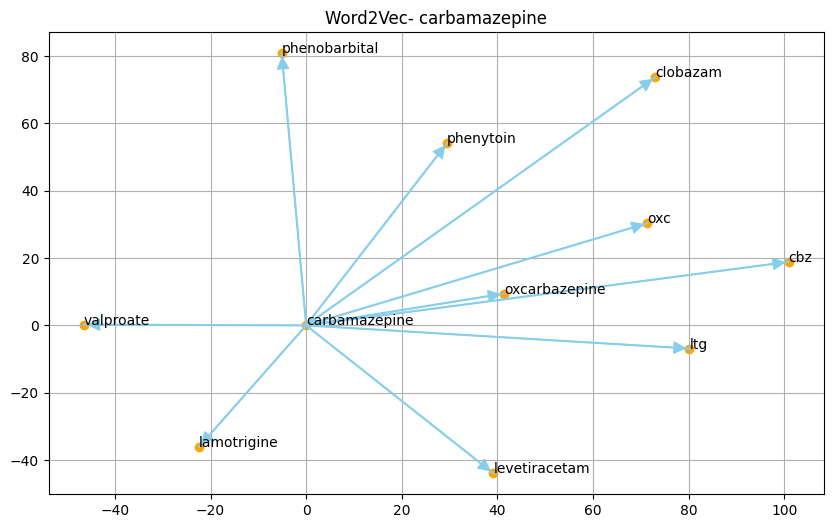

*************************************
______________________________________________________________________


In [ ]:
for check_word in medication_spell:
  print("*************************************")
  print(f"Starting loop for {check_word}")
  print("*************************************")

  try:
    similar_words = model.wv.most_similar(check_word, topn=10)

    # Save the similar words to a text file
    output_file_path = f"/content/drive/MyDrive/MajorProject/WordtoVec/results/final/{check_word}.txt"
    with open(output_file_path, 'w') as file:
        for word, similarity in similar_words:
            file.write(f"{word}: {similarity}\n")

    # Display the similar words
    print(f"Words similar to {check_word}: {similar_words}")

    words_of_interest = [item[0] for item in similar_words]
    words = [check_word] + words_of_interest
    print(words)

    print("*************************************")
    print(f"Generating image for {check_word}")
    create_and_save_plot(check_word, words)
    print("*************************************")
  except:
    failed_terms.append(check_word)

  print("______________________________________________________________________")


In [ ]:
failed_terms

['carmbamazepine',
 'adherence therapy',
 'cognitive behavioral therapy',
 'cognitive remediation therapy',
 'Restlessness',
 'Irritability']